## Exercise 1

**Using the football dataset, estimate the following conditional probabilities in two different ways (one through relative frequencies and one using an approximated distribution):**

- P1: Pr(Favorite wins | point spread = 8)
- P2: Pr(Favorite wins by at least 8 points | point spread = 8)
- P3: Pr(Favorite wins by at least 8 points | point spread = 8 and favorite wins)

> # Exercise 1- Solution:

In [1]:
from numpy.ma.core import sqrt
from scipy.stats.distributions import norm_gen
%autosave 120
%matplotlib inline
import numpy as np
import pandas as pd
#%matplotlib notebook
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, clear_output
import ipywidgets as widgets
from scipy.stats import norm

Autosaving every 120 seconds


In [2]:
football_dataset_path = 'football_dataset.txt'
data = pd.read_csv(football_dataset_path, index_col=False, header=0, sep=",")
data.head()

,home,favorite,underdog,spread,favorite.name,underdog.name,week
0,1,21,13,2.0,TB,MIN,1
1,1,27,0,9.5,ATL,NO,1
2,1,31,0,4.0,BUF,NYJ,1
3,1,9,16,4.0,CHI,GB,1
4,1,27,21,4.5,CIN,SEA,1


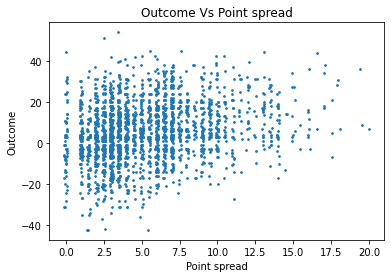

Number of games in dataset = 2240


In [3]:
outcome = np.array(data['favorite'] - data['underdog']) # Favourite wins if outcome > 0, else loses 
point_spread = np.array(data['spread']) # Spread among the teams

# Plotting Outcome Vs Point Spread
plt.figure(figsize=(6,4))
plt.scatter(point_spread +  0.2*np.random.rand((point_spread.shape[0])) - 0.1,
            outcome + 0.4*np.random.rand((outcome.shape[0])) - 0.2, s=3)
plt.xlabel('Point spread')
plt.ylabel('Outcome')
plt.title('Outcome Vs Point spread')
plt.show()
print('Number of games in dataset = ' + str(len(outcome)))

> ## $1.1$ Probabilities through relative frequencies

In [4]:
# P1: Pr(Favorite wins | point spread = 8)

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==8 and out>0: # Counting Favourite wins and point spread= 8
        i+=1
    if ps==8: # Counting point spread= 8
        j+=1
        
P1 = i / j
print('Total no. of games in the dataset for P1 case= ' + str(j))
print('P1 = ' + str(P1))

Total no. of games in the dataset for P1 case= 49
P1 = 0.7551020408163265


In [5]:
# P2: Pr(Favorite wins by at least 8 points | point spread = 8)

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==8 and out>=8:
        i+=1
    if ps==8:
        j+=1
        
P2 = i / j

print('Total no. of games in the dataset for P2 case= ' + str(j))
print('P2 = ' + str(P2))

Total no. of games in the dataset for P2 case= 49
P2 = 0.4489795918367347


In [6]:
# P3: Pr(Favorite wins by at least 8 points | point spread = 8 and favorite wins)

i=0
j=0

for out, ps in zip(outcome, point_spread):
    if ps==8 and out>=8:
        i+=1
    if ps==8 and out>0:
        j+=1
        
P3 = i / j
print('Total no. of games in the dataset for P3 case= ' + str(j))
print('P3 = ' + str(P3))

Total no. of games in the dataset for P3 case= 37
P3 = 0.5945945945945946


> ## $1.2$ Probabilities through approximated distribution

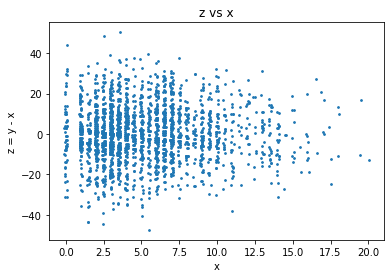

In [7]:
y = np.array(data['favorite'] - data['underdog']) # y = outcome, Favourite wins if y >0
x = np.array(data['spread']) # x = Spread
z = y - x # Z is positive if Favourite wins with more points than point spread

# Plotting z vs x
plt.figure(figsize=(6,4))
plt.scatter(x +  0.2*np.random.rand((x.shape[0])) - 0.1, 
            z + 0.4*np.random.rand((z.shape[0])) - 0.2, s=3)

plt.xlabel('x')
plt.ylabel('z = y - x')
plt.title('z vs x')
plt.show()

> ### **Remark:** 

From the previous plot it is reasonable to approximate Z with a guassian distribution with mean around $z=0$.

Sample mean = 0.22589285714285715
Sample std dev = 13.687140377113334


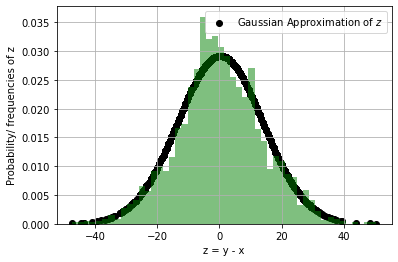

In [8]:
sample_mean = np.mean(z)
sample_std_dev = np.std(z)

print("Sample mean = " + str(sample_mean))
print("Sample std dev = " + str(sample_std_dev))

# Approximation of z through a gaussian distribution
dist = norm(loc=sample_mean, scale=sample_std_dev)

# plotting histogram and approximated Gaussian
plt.figure()
n, bins, patches = plt.hist(z, 50, density=True, facecolor='g', alpha=0.5)
plt.scatter(z, dist.pdf(z), color='black', label= 'Gaussian Approximation of $z$')
plt.xlabel('z = y - x')
plt.ylabel('Probability/ frequencies of z')
plt.grid(True)
plt.legend()
plt.show()

* $\textrm{P1} =  \textrm{Pr(Favorite wins | point spread} = 8) = \textrm{Pr}(y > 0| x=8) = \textrm{Pr}(z+x>0|x=8) = \textrm{Pr}(z>-x | x=8) = 1-\textrm{Pr}(z<= -x|x=8)= 1-\textrm{Pr}(z<= 8) = 1 - cdf_z (-8) $

* $\textrm{P2} =  \textrm{Pr(Favorite wins by atleast 8 points| point spread} = 8) = \textrm{Pr}(y >= 8| x=8) = \textrm{Pr}(z+x>=8|x=8) = \textrm{Pr}(z>= -x+8 | x=8) = 1-\textrm{Pr}(z< -x+8|x=8)= 1-\textrm{Pr}(z< 0) \approx 1 - cdf_z (0) $

* $\textrm{P3} =  \textrm{Pr(Favorite wins by atleast 8 points| point spread = 8 and favourite wins}) = \textrm{Pr}(y >= 8| x=8 \cap y>0) = \textrm{Pr}(z + x >= 8| x=8 \cap z + x >0) = \textrm{Pr}(z + 8 >= 8| z + 8 >0) = \textrm{Pr}(z >= 0| z > - 8) = 1- \textrm{Pr}(z < 0| z > - 8)= 1- (\textrm{Pr}(z < 0)- \textrm{Pr}(z < -8)) = 1- \textrm{Pr}(z < 0)+ \textrm{Pr}(z < -8) \approx 1 - cdf_z(0) + cdf_z(-8) $


In [9]:
P1_approx = 1 - dist.cdf(-8)
P2_approx = 1 - dist.cdf(0)
P3_approx = 1 - dist.cdf(0) + dist.cdf(-8)

print('P1 (Guassian Approx.)= ' + str(P1_approx))
print('P2 (Guassian Approx.)= ' + str(P2_approx))
print('P3 (Guassian Approx.)= ' + str(P3_approx))

P1 (Guassian Approx.)= 0.7260780966161547
P2 (Guassian Approx.)= 0.5065838530278768
P3 (Guassian Approx.)= 0.780505756411722


> ## Observation among relative and approximated probabilities:

* $P1$' s are relatively closer compared to other probabilities.
* $P2$' s differs more than that of $P1$.
* $P3$' s differs the most of all the probabilities.

These variation in evaluation of same quantities can be associated with the error in approximation of $z$ using a standard gaussian to that of true distribution (which is not known). 

Also, it can be a reason that we need more data points to make better inference. $P1$ and $P2$ cases has a total of $49$ games whereas $P3$ case has only $37$ games to consider.


# Exercise 2

A random sample of n students is drawn from a large population, and their weights are measured. The average weight of the n sampled students is $y^{mean} = 70$ Kg. We assume that the weights in the population are normally distributed with unknown mean $\theta$, and known standard deviation 10 Kg. Suppose your prior distribution for $\theta$ is normal with mean 80 Kg and standard deviation 15 Kg.

**1) Give the posterior distribution of $\theta$ (the answer will be a function of n).**

**2) For n=10, and n=100, give a 95% posterior interval for $\theta$.**

> # Exercise $2.1$ Solution:
## Problem Definition:
**Given Sample:** 
* $y = \{ y_1, y_2, \ldots y_n \}, \hspace{2 mm} \forall i, y_i \sim \mathcal{N}(\theta, \sigma^2)$, where $\sigma= 10$
* $\bar{y} = \frac{\sum_{i=1}^{n}y_i}{n}$ = $y^{mean} = 70$ Kg.
* Prior distribution of $\theta$, $p(\theta) = \mathcal{N}(\mu_0, \tau_0^2)$, where $\mu_{0}= 80$ and $\tau_{0}= 15$

**Goal:**
Find posterior distribution of $\theta:$ $p(\theta | y)$

From Baye's Theorem:
$$ p(\theta | y) = \frac{p(y|\theta)p(\theta)}{p(y)} .$$

Since $p(y)$ is a normalisation factor. We get $p(\theta | y) \propto p(y|\theta)p(\theta).$

Therefore, we can have $p(\theta | y) \sim p(y|\theta)p(\theta)$

From the lecture we have the following result:
### Multiple Gaussian obervations

The multiple Gaussian distributed observations of $y = y_1, y_2, \ldots y_n$. By assuming independent property and exchangeability among the sample observations, we have: 

$$p(y|\theta) = p(y_1, y_2, \ldots y_n|\theta) = p(y_1|\theta)p(y_2|\theta)\ldots p(y_n|\theta).$$

As, $p(y_i|\theta) = \mathcal{N}(\theta, \sigma^2)$

$$p(y|\theta) = \frac{1}{(2\pi)^{\frac{n}{2}}\sigma^n}\exp(\frac{-1}{2\sigma^2}\sum_{i=1}^n (y_i-\theta)^2).$$ 

$$p(y|\theta)p(\theta) \propto \exp[-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i-\theta)^2 - \frac{1}{2\tau_0^2}(\theta-\mu_0)^2]$$

By re-writing $$\sum_{i}(y_i-\theta)^2 = \sum_i y_i^2 - 2 \theta \sum_i y_i + n\theta^2.$$ and developing for the above equation we get: 

$$p(y|\theta) \sim \exp\big[\frac{-1}{2}[ \theta^2(\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}) -2\theta (\frac{\sum_i y_i}{\sigma^2} + \frac{\mu_0}{\tau_0^2}) +(\frac{\sum_i y_i^2}{\sigma^2}+ \frac{\mu_0^2}{\tau_0^2})]\big]$$
$$ p(y|\theta) \sim \exp\left( -\frac{1}{2} [l \theta^2  - 2 m \theta +  n]\right),$$

with

$$ l = \frac{n}{\sigma^2} + \frac{1}{\tau_0^2},$$

$$ m =  \frac{n \bar{y}}{\sigma^2} + \frac{\mu_0}{\tau_0^2},(using \hspace{2mm} \sum_i y_i= n\bar{y})$$

and

$$ n = \frac{y^2 }{\sigma^2} +  \frac{\mu_0^2}{\tau_0^2}.$$ 

It is already shown in the lecture that the posterior takes the form $p(\theta|y)\sim \mathcal{N}(\mu_n,\sigma_n^2)$, (conjugate) with:


$$ \sigma_n^2 = \frac{1}{l}= \frac{1}{\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}}= \frac{1}{\frac{n}{10^2} + \frac{1}{15^2}}= \frac{900}{9n + 4},$$

and,

$$ \mu_n = \frac{m}{l}= \frac{\frac{n \bar{y}}{\sigma^2} + \frac{\mu_0}{\tau_0^2}}{\frac{n}{\sigma^2} + \frac{1}{\tau_0^2}}= \frac{\frac{70n}{10^2} + \frac{80}{15^2}}{\frac{n}{10^2} + \frac{1}{15^2}}= (\frac{7n}{10} + \frac{16}{45})*(\frac{900}{9n + 4})$$

> # Exercise $2.2$ Solution:

## $2.2.1$ For $n = 10$:

$p(\theta|y)\sim \mathcal{N}(\mu_{10},\sigma_{10}^2)$:


$$ \sigma_{10}^2 = \frac{1}{\frac{10}{10^2} + \frac{1}{15^2}}= 9.57,$$

and,

$$ \mu_{10} = \frac{\frac{10*70}{10^2} + \frac{80}{15^2}}{\frac{10}{10^2} + \frac{1}{15^2}}= 70.43,$$

## $2.2.2$ For $n = 100$:

$p(\theta|y)\sim \mathcal{N}(\mu_{100},\sigma_{100}^2)$:


$$ \sigma_{100}^2 = \frac{1}{\frac{100}{10^2} + \frac{1}{15^2}}= 1,$$

and,

$$ \mu_{100} = \frac{\frac{100*70}{10^2} + \frac{80}{15^2}}{\frac{100}{10^2} + \frac{1}{15^2}}= 70.04,$$

### Posterior Inference: (Same inference can be made by the visual graph below)

* The posterior distribution in both cases has a consistent mean around $70 Kg$ (approx.) and found to be same as that of empirical mean of the total samples.
*The posterior variance in either cases ($9.57$ & $1$) is far lower than that of both quantities assumed for population and prior distribution ($\sigma^2= 100, \hspace{1 mm} \tau_0^2= 225$). Therefore now we have a better idea and high confidence about the data distribution.
* It is also seen as we observe more data $10$ vs. $100$ samples, our variance decreased significantly from $9.57$ to $1$ which shows more data helps in better understanding of posterior distribution.

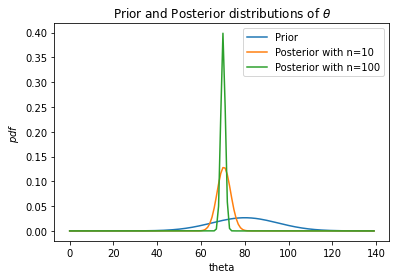

In [10]:

theta = np.arange(0,140,1)
prior_mean = 80
prior_std_dev = 15
prior_dist = norm(loc=prior_mean, scale=prior_std_dev)

posterior_mean_10 = 70.43
posterior_std_dev_10 = sqrt(9.57)
posterior_dist_10 = norm(loc=posterior_mean_10, scale=posterior_std_dev_10)

posterior_mean_100 = 70.04
posterior_std_dev_100 = sqrt(1)
posterior_dist_100 = norm(loc=posterior_mean_100, scale=posterior_std_dev_100)

#plotting distribution

mean_prior, var_prior, skew_prior, kurt_prior = prior_dist.stats(moments='mvsk')
mean_posterior_10, var_posterior_10, skew_posterior_10, kurt_posterior_10 = posterior_dist_10.stats(moments='mvsk')
mean_posterior_100, var_posterior_100, skew_posterior_100, kurt_posterior_100 = posterior_dist_100.stats(moments='mvsk')


plt.plot(theta,prior_dist.pdf(theta), label= 'Prior')
plt.plot(theta,posterior_dist_10.pdf(theta), label= 'Posterior with n=10')
plt.plot(theta,posterior_dist_100.pdf(theta), label= 'Posterior with n=100')

plt.title('Prior and Posterior distributions of'r' $\theta$')
plt.ylabel(r'$pdf$')
plt.xlabel('theta')
plt.legend()
plt.show()

> ## 2.2: **95%** posterior interval for $\theta$

In [11]:
sample_counter = [0, 1]

posterior_mean = [posterior_mean_10, posterior_mean_100]
posterior_std_dev = [posterior_std_dev_10, posterior_std_dev_100]

results = []

for i in sample_counter:
    sample_posterior = norm.rvs(loc= posterior_mean[i], scale= posterior_std_dev[i], size=500) 
    sample_stats = np.quantile(sample_posterior, [0.025, 0.5, 0.975])
    results.append([norm.mean(loc= posterior_mean[i], scale= posterior_std_dev[i]), norm.var(loc= posterior_mean[i], scale= posterior_std_dev[i]), sample_stats[1], [sample_stats[0], sample_stats[2]]])

print(pd.DataFrame(results, columns=['Mean', 'Variance', 'Median','95% posterior CI']))

    Mean  Variance     Median                        95% posterior CI
0  70.43      9.57  70.253724  [64.08072419037397, 76.95639739282267]
1  70.04      1.00  70.043067  [67.95304478318538, 71.96343355951538]


# Exercise 3

Suppose your prior distribution for $\theta$, the proportion of Californians who support the death penalty, is Beta with mean 0.6 and standard deviation 0.3.

**1) Determine the parameters $\alpha$ and $\beta$ of your prior distribution and plot it.**

**2) A random sample of 1000 Californians is taken, 65% support the death peanlty. What are your posterior mean and variance ? Plot the posterior density function.**

**3) Examine the impact of the prior parameters on the posterior distribution through different statistics (i.e mean, median, 95% posterior interval).**

> # Exercise 3 Solution:

Prior Distribution of $\theta$: $\theta \sim\textrm{Beta}(\alpha,\beta)$




> ## Exercise 3_1 Solution:

Given $E(\theta)= 0.6$ and $Var(\theta)= 0.3* 0.3= 0.09$ 

$E(\theta)=\frac{\alpha}{\alpha+\beta}$, $Var(\theta)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$

Taking $\beta = \alpha * (\frac{1}{E(\theta)} - 1)$ and plugging this value in $Var(\theta)$ and then by solving we get $$\alpha = \frac{(1-E(\theta))* (E(\theta))^2}{Var(\theta)} - E(\theta)= \frac{(1-0.6)* (0.6)^2}{0.09} - 0.6= 1$$ This results in $\alpha = 1$. Using this value in the $\beta$ equation above gives:$$\beta = \alpha * (\frac{1}{E(\theta)} - 1)= 1 * (\frac{1}{0.6} - 1)= \frac{2}{3}$$

Therefore our Prior Distribution of $\theta$: $\theta \sim\textrm{Beta}(1,2/3)$

> ### Plot of Prior Beta Distribution of $\theta$: $\theta \sim\textrm{Beta}(1,2/3)$

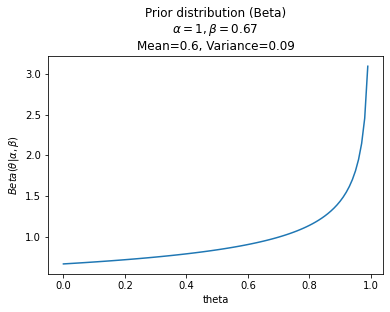

In [12]:
from  scipy.stats import beta
%matplotlib inline

theta = np.arange(0,1,.01)
a = 1
b = 2/3
# Creating the Prior Beta 
prior = beta(a, b)
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')


plt.plot(theta,prior.pdf(theta))
plt.title('Prior distribution (Beta)''\n'r'$\alpha=$' + str(a) + r'$, \beta=$' + str(round(b,2))+'\n' + r'Mean='+ str(np.round(mean,2))+ r', Variance='+ str(np.round(var,2)))
plt.ylabel(r'$Beta(\theta|\alpha,\beta)$')
plt.xlabel('theta')
plt.show()

> ## Exercise 3_2 Solution:

Here the Prior follows Beta:
$$p(\theta) = Beta(\alpha,\beta) \propto \theta^{\alpha-1}(1-\theta)^{\beta-1},$$

and Likelihood follows a Binomial Sampling model:
$$ p(y|n, \theta) = {{n}\choose{y}} \theta^y(1-\theta)^{n-y} .$$

With $n= 1000$ and $y = 1000* 0.65 = 650$

$$p(y|\theta) \propto \theta^y (1-\theta)^{n-y},$$

We already have seen in the lecture that in this kind of model both posterior and prior have same form of distribution, since the prior is the conjugate of the likelihood.

$$p(\theta|y) = p(y|\theta)p(\theta) \propto \theta^{y+\alpha-1}(1-\theta)^{n+\beta-y-1} \propto Beta(\theta|\alpha+y,n+\beta-y)$$

Hence, the posterior distribution is (proportional to):
$$p(\theta|y) = Beta(\alpha + y,n + \beta - y) = Beta(651 , 350.67)$$

**Posterior mean:**
$$E(\theta|y)=\frac{651}{651+350.67}= 0.65$$
**Posterior variance:**
$$Var(\theta)=\frac{651* 350.67}{(651+ 350.67)^2(651+ 350.67+1)}= 0.00023$$

> ### Plot of Posterior Density function of $p(\theta|y)$: $\theta|y \sim\textrm{Beta}(651,350.67)$

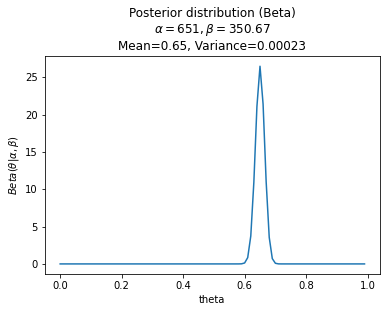

In [13]:
from  scipy.stats import beta
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

theta = np.arange(0,1,.01)
a = 651
b = 350.67
# Creating the Posterior Beta 
posterior = beta(a, b)
mean, var, skew, kurt = beta.stats(a, b, moments='mvsk')


plt.plot(theta,posterior.pdf(theta))
plt.title('Posterior distribution (Beta)''\n'r'$\alpha=$' + str(a) + r'$, \beta=$' + str(round(b,2))+'\n' + r'Mean='+ str(np.round(mean,2))+ r', Variance='+ str(np.round(var,5)))
plt.ylabel(r'$Beta(\theta|\alpha,\beta)$')
plt.xlabel('theta')
plt.show()

> ### **Observation:**

The Prior and Posterior distributions look very different. The prior variance is very high, whereas the posterior has very low variance, which can be good. Interestingly, both distributions have similar mean. Let us investigate if choosing a different prior might yield different results. 

> ## Exercise 3_3 Solution: Impact of Prior parameters on Posterior Distribution

In [14]:
n = 1000
y = 650

alpha_prior = [1,20,60,100]
beta_prior = [2/3,10,25,50]
pairs = [[ai, bi] for ai in alpha_prior for bi in beta_prior]

results = []

for a,b in pairs:
    posterior_alpha = y + a
    posterior_beta = n + b - y
    sample_posterior = np.random.beta(posterior_alpha, posterior_beta, size=500) 
    sample_stats = np.quantile(sample_posterior, [0.025, 0.5, 0.975])
    results.append([a,b, posterior_alpha, posterior_beta, a/(a+b), (a*b)/ (((a + b)**2)*(a + b +1)), posterior_alpha/(posterior_alpha+posterior_beta),  (posterior_alpha*posterior_beta)/ (((posterior_alpha + posterior_beta)**2)*(posterior_alpha + posterior_beta +1)), sample_stats[1], [sample_stats[0], sample_stats[2]]])

print(pd.DataFrame(results, columns=['Prior alpha', 'Prior beta', 'Posterior alpha', 'Posterior beta','Prior mean', 'Prior Variance', 'Posterior mean', 'Posterior Variance','Posterior median','95% posterior CI']))

    Prior alpha  Prior beta  Posterior alpha  Posterior beta  Prior mean  \
0             1    0.666667              651      350.666667    0.600000   
1             1   10.000000              651      360.000000    0.090909   
2             1   25.000000              651      375.000000    0.038462   
3             1   50.000000              651      400.000000    0.019608   
4            20    0.666667              670      350.666667    0.967742   
5            20   10.000000              670      360.000000    0.666667   
6            20   25.000000              670      375.000000    0.444444   
7            20   50.000000              670      400.000000    0.285714   
8            60    0.666667              710      350.666667    0.989011   
9            60   10.000000              710      360.000000    0.857143   
10           60   25.000000              710      375.000000    0.705882   
11           60   50.000000              710      400.000000    0.545455   
12          

> Observation:

It can be clearly seen that the posterior distribution is not very sensitive to the prior distribution i.e., all the posterior median, mean and CI interval are very consistent and compact. This is because the likelihood has dominating impact on posterior than prior distribution because the data seen for any given prior is sufficient to make a solid estimation of the posterior (as $n= 1000$ and  $y= 650$). This is evident by very low variance of posterior compared to that of prior and $95$ % confidence interval is also very small and consistent for all combinations of prior parameters.

# Exercise 4

**1) Which of the expressions below correspond to the statement: *the probability of rain on Monday* ?**

- Pr(rain)
- Pr(rain|Monday)
- Pr(Monday|rain)
- Pr(rain, Monday) / Pr(Monday)

**2) Which of the following statements corresponds to the expression: *Pr(Monday|rain)* ?**

- The probability of rain on Monday.
- The probability of rain, given that it is Monday.
- The probability that it is Monday, given that it is raining.
- The probability that it is Monday and it is raining.

**3) Which of the expressions below correspond to the statement: *the probability that it is Monday, given that it is raining* ?**

- Pr(Monday|rain)
- Pr(rain|Monday)
- Pr(rain | Monday)Pr(Monday)
- Pr(rain | Monday)Pr(Monday)/Pr(rain)
- Pr(Monday|rain)Pr(rain)/Pr(Monday)

> # Exercise 4 Solution:

> ## Exercise 4_1 Solution:

  > - Pr(rain|Monday)
  > - Pr(rain, Monday) / Pr(Monday)
  
> ## Exercise 4_2 Solution:

  > - The probability that it is Monday, given that it is raining.

> ## Exercise 4_3 Solution:

  > - Pr(Monday|rain)
  > - Pr(rain | Monday)Pr(Monday)/Pr(rain)

# Exercise 5

Suppose there are two species of panda bear. Both are equally common in the wild and live in the same places. They look exactly alike and eat the same food, and there is yet no genetic assay capable of telling them appart. They differ however in their family sizes. Species A gives birth to twins 10% of the time, otherwise birthing a single infant. Species B births twins 20% of the time, otherwise birthing singleton infants. Assume these numbers are known with certainty, from many years of field research. Now suppose you are managing a captive panda breeding program. You have a new female panda of unknown species, and she has just given birth to twins. 

**What is the probability that her next birth will also be twins ?**

> # Exercise 5 Solution:
## Problem Definition:

## Let us define the events w.r.t the given information:

Species, $S$: $ S \in {\{A, B\}} $

- $A$ :- Species $A$.

    $\mathbf{P}(A) = 0.5$ #Since both species are equally likely.

- $B$ :- Species $B$.

    $\mathbf{P}(B) = 0.5$ #Since both species are equally likely.

- $A, T$ :- Species $A$ giving birth to twins.

    $\mathbf{P}(A, T) = 0.1$

- $B, T$ :- Species $B$ giving birth to twins.

    $\mathbf{P}(B, T) = 0.2$

- $S, T$ :- A particular female panda $\in S$ giving birth to twins during first pregency.

  $\begin{align}
\mathbf{P}(S, T) &= \mathbf{P}(A)* \mathbf{P}((S, T)|S= A) + \mathbf{P}(B)* \mathbf{P}((S, T)| S= B)\\
&= \mathbf{P}(A)* \mathbf{P}(A, T) + \mathbf{P}(B)* \mathbf{P}(B, T)\\
&= 0.5* 0.1 + 0.5* 0.2 = 0.15 \tag{1}
\end{align}$

- $S, T2$ :- The same female panda giving birth to twins during the second pregency.

## Goal: Find, $ \mathbf{P}((S, T2)|(S, T)) $

**From Baye's Theorem:**

$\begin{align}
\mathbf{P}((S, T2)|(S, T)) &= \frac{\mathbf{P}((S, T2), (S, T))}{\mathbf{P}(S, T)} \\
&= \frac{\mathbf{P}(A)* \mathbf{P}(((S, T2), (S, T))|S= A) + \mathbf{P}(B)* \mathbf{P}(((S, T2), (S, T))|S= B)}{\mathbf{P}(S, T)}\\
&= \frac{\mathbf{P}(A)* \mathbf{P}((A, T2), (A, T)) + \mathbf{P}(B)* \mathbf{P}((B, T2), (B, T))}{\mathbf{P}(S, T)} \tag{2}
\end{align}$

## Remark: 
- The two births are independent events.

  Therefore, 

  $\begin{align}
  \mathbf{P}((A, T2), (A, T)) = \mathbf{P}(A, T2)* \mathbf{P}(A, T) \\
  \mathbf{P}((B, T2), (B, T)) = \mathbf{P}(B, T2)* \mathbf{P}(B, T)
  \end{align}$
- $\mathbf{P}(A, T) = \mathbf{P}(A, T2)= 0.1$
- $\mathbf{P}(B, T) = \mathbf{P}(B, T2)= 0.2$



Continuing from equation (2) and final result of equation (1), 

$\begin{align}
\mathbf{P}((S, T2)|(S, T)) &= \frac{\mathbf{P}(A)* \mathbf{P}(A, T2)* \mathbf{P}(A, T) + \mathbf{P}(B)* \mathbf{P}(B, T2)* \mathbf{P}(B, T)}{\mathbf{P}(S, T)}\\
&= \frac{0.5* 0.1* 0.1 + 0.5* 0.2* 0.2}{0.15} = 0.1667
\end{align}$